In [6]:
import pandas as pd
import numpy as np
import math
from os import listdir
from os.path import isfile, join
from ipynb.fs.defs.functions import new_route
import matplotlib.pyplot as plt

dft = pd.read_csv("../Dati/distanze/corrected_times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
dfd = pd.read_csv("../Dati/distanze/distances_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
onlyfiles = [f for f in listdir("../Dati/turni_f/") if isfile(join("../Dati/turni_f/", f))]

In [48]:
def get_table_cost(path, dframe):
    cols = ["lunedi","martedi","mercoledi","giovedi","venerdi","tot"]
    resume_table = pd.DataFrame(columns = cols)
 
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
##parte che serve per filtrare i file con km nel nome, nella cartella dei greedy   
#     files = []
#     for f in onlyfiles:
#         if "km" not in f.lower():
#             files.append(f)
#     onlyfiles = files[:]
##    
    for file in onlyfiles:
        resume_table = pd.concat([resume_table, pd.Series(index=[file], dtype=float)])[cols]
        current_file = pd.read_csv(path+file, delimiter=";", encoding = "ISO-8859-1")
        for day in current_file.columns:
            
            resume_table[day].loc[file] = sum(new_route(current_file[day].dropna(), dframe).values)
    
        resume_table["tot"].loc[file] = sum(resume_table.loc[file].dropna())
        
    return resume_table

In [49]:
resume_time_table = get_table_cost("../Dati/turni_f/fine_optimized_start/", dft)
resume_distance_table = get_table_cost("../Dati/turni_f/fine_optimized_start/", dfd)

In [50]:
resume_time_table

,lunedi,martedi,mercoledi,giovedi,venerdi,tot
foss_2opt1.csv,169.0,68.0,266.0,236.0,289.0,1028.0
foss_2opt2.csv,NaN,135.0,144.0,136.0,NaN,415.0
foss_f1.csv,244.0,122.0,428.0,366.0,710.0,1870.0
foss_f2.csv,NaN,121.0,402.0,302.0,NaN,825.0
foss_greedy1.csv,177.0,68.0,339.0,244.0,343.0,1171.0
foss_greedy2.csv,NaN,140.0,144.0,147.0,NaN,431.0
foss_ls1.csv,177.0,68.0,339.0,236.0,342.0,1162.0
foss_ls2.csv,NaN,140.0,144.0,136.0,NaN,420.0
foss_MVLS1.csv,300.0,192.0,132.0,311.0,71.0,1006.0
foss_MVLS2.csv,NaN,99.0,250.0,37.0,NaN,386.0


In [51]:
total_table = pd.DataFrame(columns=["time", "distance"])
col = ["time", "distance"]
for r in range(0, len(resume_time_table), 2):
    file = resume_time_table.index[r]
    curr_indx = file.replace('1', '')
    total_table = pd.concat([total_table, pd.Series(index=[curr_indx], dtype=float)])[col]
    total_table["time"].loc[curr_indx] = resume_time_table["tot"].iloc[r] + resume_time_table["tot"].iloc[r+1]
    total_table["distance"].loc[curr_indx] = resume_distance_table["tot"].iloc[r] + resume_distance_table["tot"].iloc[r+1]
total_table = total_table[col]
total_table

,time,distance
foss_2opt.csv,1443.0,1328.0
foss_f.csv,2695.0,2715.0
foss_greedy.csv,1602.0,1485.0
foss_ls.csv,1582.0,1477.0
foss_MVLS.csv,1392.0,1247.0


In [52]:
resume_time_table.to_csv("../Dati/altro/resume_folder/foss_time_table.csv", sep=";", encoding = "ISO-8859-1")
resume_distance_table.to_csv("../Dati/altro/resume_folder/foss_distance_table.csv", sep=";", encoding = "ISO-8859-1")
total_table.to_csv("../Dati/altro/resume_folder/foss_total_table.csv", sep=";", encoding = "ISO-8859-1")

In [2]:
table = pd.read_csv("../Dati/altro/resume_folder/original_time_table.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)

In [12]:
table

,lunedi,martedi,mercoledi,giovedi,venerdi,tot
f1_original.csv,235.0,246.0,283.0,261.0,239.0,1264.0
f2_original.csv,NaN,243.0,82.0,188.0,NaN,513.0
original_2opt1.csv,187.0,210.0,199.0,174.0,191.0,961.0
original_2opt2.csv,NaN,220.0,82.0,171.0,NaN,473.0
original_ls1.csv,197.0,224.0,219.0,227.0,216.0,1083.0
original_ls2.csv,NaN,220.0,82.0,183.0,NaN,485.0
original_MVLS1.csv,244.0,160.0,393.0,80.0,315.0,1192.0
original_MVLS2.csv,NaN,86.0,84.0,37.0,NaN,207.0


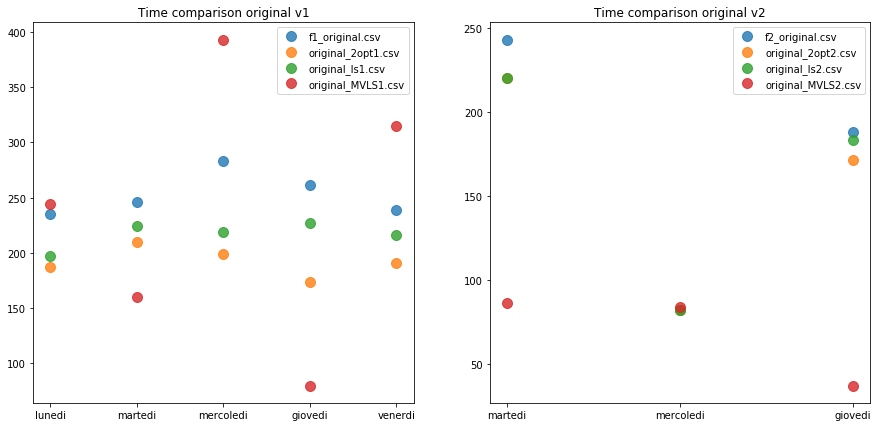

In [39]:
leg = []
plt.figure(figsize=[15,7])

plt.subplot(121)
plt.title("Time comparison original v1")
for x in range(0,len(table),2):
    plt.plot(table.iloc[x][table.columns[:len(table.columns)-1]], "o", markersize=10.0, alpha=0.8)
    leg.append(table.index[x])
plt.legend(leg)
plt.subplot(122)
plt.title("Time comparison original v2")
leg = []
for x in range(1,len(table),2):
    plt.plot(table.iloc[x][table.columns[:len(table.columns)-1]], "o", markersize=10.0, alpha=0.8)
    leg.append(table.index[x])
plt.legend(leg)
plt.show()
